In [22]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

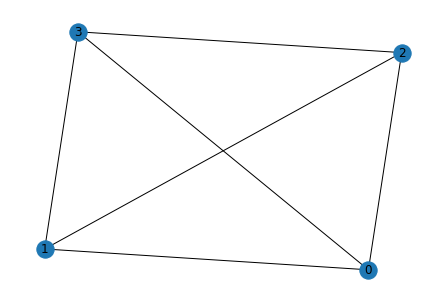

In [26]:
# Define the problem graph
graph = nx.Graph()
graph.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)])
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True)

# Initialize parameters
num_ants = 10
num_iterations = 50
evaporation_rate = 0.5
alpha = 1.0
beta = 2.0

# Initialize pheromone values to a positive power
num_cities = len(graph.nodes)
pheromone = [[1.0 for j in range(num_cities)] for i in range(num_cities)]

# Define the ant class
class Ant:
    def __init__(self, start_city):
        self.visited_cities = [start_city]
        self.current_city = start_city

    def select_next_city(self):
        unvisited_cities = [city for city in graph.neighbors(self.current_city) if city not in self.visited_cities]
        if not unvisited_cities:
            return None
        pheromone_levels = [pheromone[self.current_city][city] for city in unvisited_cities]
        total = sum(pheromone_levels)
        probabilities = [pheromone / total for pheromone in pheromone_levels]
        next_city = random.choices(unvisited_cities, probabilities)[0]
        self.visited_cities.append(next_city)
        self.current_city = next_city
        return next_city

# Define the ACO algorithm function
def aco():
    best_path = []
    best_path_length = float('inf')
    best_path_lengths = []

    for iteration in range(num_iterations):
        ants = [Ant(random.randint(0, num_cities - 1)) for i in range(num_ants)]
        paths = []
        path_lengths = []

        # Generate paths for each ant
        for ant in ants:
            while ant.select_next_city():
                pass
            paths.append(ant.visited_cities)
            path_length = sum([graph[paths[-1][i]][paths[-1][i + 1]]['weight'] for i in range(num_cities - 1)])
            path_lengths.append(path_length)

            # Update best path if necessary
            if path_length < best_path_length:
                best_path_length = path_length
                best_path = paths[-1]
        
        # Update pheromone levels
        for i in range(num_cities):
            for j in range(num_cities):
                if i != j:
                    pheromone[i][j] *= (1 - evaporation_rate)
                    for path in paths:
                        if (i, j) in zip(path, path[1:]):
                            pheromone[i][j] += 1.0 / path_lengths[paths.index(path)]

        best_path_lengths.append(best_path_length)


NameError: name 'best_path' is not defined

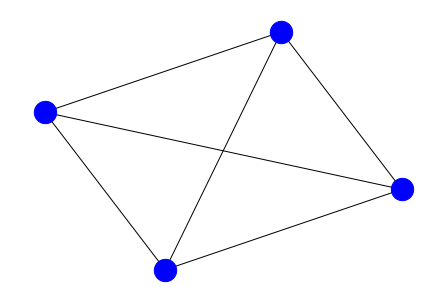

In [28]:
# Plot the best path
pos = nx.spring_layout(graph)
nx.draw(graph, pos, node_color='b', node_size=500)
nx.draw_networkx_nodes(graph, pos, nodelist=best_path, node_color='r', node_size=500)
nx.draw_networkx_edges(graph, pos, edgelist=zip(best_path, best_path[1:]), edge_color='r', width=5)
plt.show()


In [25]:
# Run the optimization
aco = AntColonyOptimizer(num_ants=10, num_iterations=50, alpha=1, beta=3, rho=0.1, Q=1)
best_path, best_path_length, best_paths, best_path_lengths = aco.optimize(distances)


ValueError: Integers to negative integer powers are not allowed.

In [21]:

# Plot the best path
best_path = best_paths[np.argmin(best_path_lengths)]
best_path_length = best_path_lengths[np.argmin(best_path_lengths)]
print(f"Best path: {best_path}, Length: {best_path_length}")

# Draw the graph with the best path
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos)
nx.draw_networkx_labels(graph, pos)
nx.draw_networkx_edges(graph, pos)
nx.draw_networkx_edges(graph, pos, edgelist=[(best_path[i]-1, best_path[i+1]-1) for i in range(len(best_path)-1)], edge_color='r', width=2)
plt.show()






NameError: name 'best_paths' is not defined